## <center> Homework3 - IE7275 - Group1 </center>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import *
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# Problem 1 - Part A

In [2]:
df_wine = pd.read_csv('wine.csv')

# Standarard Scaling without Sklearn
df_X_std = np.array(df_wine.iloc[:,0:13])
for i in range(0,13):
    df_X_std[:,i] = (df_X_std[:,i] - np.mean(df_X_std[:,i]))/np.std(df_X_std[:,i])

# Finding the covariance matrix
cov_mat= np.cov(df_X_std, rowvar=False) 

# eigenvalues and eigenvectors
cov_mat = np.cov(df_X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print("Eigen Values:\n",eig_vals)
print("\nEigen Vectors:\n",eig_vecs)

Eigen Values:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]

Eigen Vectors:
 [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.3

In [3]:
sum_eig = sum(eig_vals) 
print("\n",sum_eig)
var_exp = [(i / sum_eig)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 13.073446327683618


1. Variance Explained
 [36.19884809992635, 19.207490257008924, 11.123630536249998, 7.069030182714033, 6.563293679648598, 4.935823319222561, 4.238679322623328, 2.6807489483788642, 2.222153404789708, 1.9300190939440798, 1.7368356899899147, 1.2982325756042157, 0.7952148898994494]


2. Cumulative Variance Explained
 [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


3. Percentage of variance the first two principal components each contain
  [36.19884809992635, 19.207490257008924]


4. Percentage of variance the first two principal components together contain
 55.40633835693528


In [4]:
# Select the eigenvectors of the principal components
eigen_vec_reshaped = np.hstack((eig_vecs[:,0].reshape(13,1), eig_vecs[:,1].reshape(13,1))) 
df_wine_pca = df_X_std.dot(eigen_vec_reshaped) 
principalDf = pd.DataFrame(data = df_wine_pca , columns = ['principal component 1', 'principal component 2']) 
final_transformed_Df = pd.concat([principalDf,pd.DataFrame(df_wine,columns = ['target'])], axis = 1) 
final_transformed_Df.head()

,principal component 1,principal component 2,target
0,-3.316751,1.443463,0
1,-2.209465,-0.333393,0
2,-2.516740,1.031151,0
3,-3.757066,2.756372,0
4,-1.008908,0.869831,0


# Problem 1- Part B

In [5]:
df_raw_wine = pd.read_csv('wine.csv')
df_raw_array = np.array(df_raw_wine.iloc[:,0:13])

In [6]:
pca_raw = PCA(n_components=3)
principalComponents_raw = pca_raw.fit_transform(df_raw_array)
principalDf_raw = pd.DataFrame(data = principalComponents_raw
             , columns = ['principal component 1', 'principal component 2','principal component 2'])
final_transformed_Df_raw = pd.concat([principalDf_raw,pd.DataFrame(df_wine,columns = ['target'])], axis = 1) 
final_transformed_Df_raw.head()

,principal component 1,principal component 2,principal component 2,target
0,318.562979,21.492131,3.130735,0
1,303.097420,-5.364718,6.822835,0
2,438.061133,-6.537309,-1.113223,0
3,733.240139,0.192729,-0.917257,0
4,-11.571428,18.489995,-0.554422,0


In [7]:
#Explained Variance
print("Explained variance: ", pca_raw.explained_variance_)
#cumulative proportion of variance
print ("Cumulative proportion of variance:", pca_raw.explained_variance_ratio_.cumsum())
# proportion variance
print("Proportion variance:", pca_raw.explained_variance_ratio_)

Explained variance:  [9.92017895e+04 1.72535266e+02 9.43811370e+00]
Cumulative proportion of variance: [0.99809123 0.99982715 0.99992211]
Proportion variance: [9.98091230e-01 1.73591562e-03 9.49589576e-05]


# Problem 1- Part C

In [8]:
pca_std = PCA(n_components=3)
principalComponents_std = pca_std.fit_transform(df_X_std)
principalDf_std = pd.DataFrame(data = principalComponents_std
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
final_transformed_Df_std = pd.concat([principalDf_std,pd.DataFrame(df_wine,columns = ['target'])], axis = 1) 
final_transformed_Df_std.head()

,principal component 1,principal component 2,principal component 3,target
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


In [9]:
#Explained Variance
print("Explained variance:", pca_std.explained_variance_)
#cumulative proportion of variance
print ("Cumulative proportion of variance:" ,pca_std.explained_variance_ratio_.cumsum())
# proportion variance
print("proportion variance:", pca_std.explained_variance_ratio_)

Explained variance: [4.73243698 2.51108093 1.45424187]
Cumulative proportion of variance: [0.36198848 0.55406338 0.66529969]
proportion variance: [0.36198848 0.1920749  0.11123631]


# Problem 1 - Part D

The PCA always calculates a new projection of our dataset. Therefore the new axis will be based on our standard deviation of variables. Hence, a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If we normalize our data, all variables will have the same standard deviation, thus all variables have the same weight and our PCA will calculate the relevant axis.

So in problem 1 -Part B, we have used Raw data. Therefore, here it looks like component one explains most of the variance in the data. However, when we have normalized our data in Problem 1 -PartC, it is clear that the other components contribute as well. The reason for this is because PCA seeks to maximize the variance of each component.

# Problem 1 - Part E

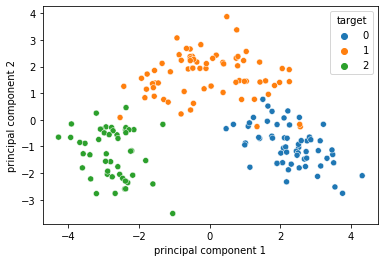

In [10]:
sns.scatterplot(data=final_transformed_Df_std,x="principal component 1", y="principal component 2", hue = "target", palette="tab10")

From above scatter plot it is clear that PC1 and PC2 has almost zero correlation.
The data is divided into two clusters by the first main component. The wine data from target 0 is in the left cluster. We can see there are a few outliers, such as target 1's PC1 score being higher than the other targets (0 and 2). Target value 1 has higher PCA values compare to Traget value 0 and Target value 2. Most of the PCA values of Target value 1 is above 1.


# Problem 2

In [38]:
def perform_evalu_metrics(actual: np.ndarray, predicted: np.ndarray):
    n = len(actual)
    error = actual - predicted
    percentage_error = (error/ actual)*100
    mse = np.mean(np.square(error))
    rmse = np.sqrt(mse) 
    ae = sum((error))/n
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs(percentage_error))
    ssr = sum(np.square((error)))
    
    print("Average Error(AE):", ae)
    print("Mean Absolute Error(MAE) :",mae)
    print("Mean Absolute Percentage Error(MAPE):",mape)
    print("Root Mean Square Error(RMSE):",rmse)
    print("Sume Of Square Error(SSE):",ssr) 

print("Enter size of both vector")
num_of_ele = np.int(input())

print("\nEnter the numbers into first vector")
actual = []
for i in range(0,num_of_ele):
    actual.append(input())

print("\nEnter the numbers into second vector")
predicted = []
for i in range(0,num_of_ele):
    predicted.append(input())    
    

perform_evalu_metrics(np.array(actual).astype(np.float),np.array(predicted).astype(np.float))

Enter size of both vector
3

Enter the numbers into first vector
1
2
3

Enter the numbers into second vector
2
2
3
Average Error(AE): -0.3333333333333333
Mean Absolute Error(MAE) : 0.3333333333333333
Mean Absolute Percentage Error(MAPE): 33.333333333333336
Root Mean Square Error(RMSE): 0.5773502691896257
Sume Of Square Error(SSE): 1.0


# Problem 3

In [39]:
print("Enter size of both vectors")
num_of_ele = np.int(input())
print("\nEnter the numbers into first vector")
y_actual = []
for i in range(0,num_of_ele):
    y_actual.append(input())
    
print("\nEnter the numbers into second vector")
y_pred = []
for i in range(0,num_of_ele):
    y_pred.append(input())

def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    y_actual = np.array(y_actual).astype(np.int)
    y_pred = np.array(y_pred).astype(np.int)
    
    if(not(np.array_equal(y_actual, y_actual.astype(bool)) and np.array_equal(y_pred, y_pred.astype(bool)))):
        print(np.array_equal(y_actual, y_actual.astype(bool)))
        print(np.array_equal(y_pred, y_pred.astype(bool)))
        return "Non-binary classification result detected"       
    else:
        for i in range(len(y_pred)):      
            if y_actual[i]==y_pred[i]==1:
               TP += 1
            if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
               FP += 1
            if y_actual[i]==y_pred[i]==0:
               TN += 1
            if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
               FN += 1  

        try:
            print("TP:", TP, "FP:",FP, "FN:",FN, "TN:",TN )
            print("confusion matrix : \n",np.array([[TN,FP],[FN,TP]]))
            print("Overall Accuracy :",(TP + TN) / (TP + FP + FN + TN))
            SE = TP/(TP + FN)
            SP = TN/(TN + FP)
            print("Sensitivity",SE)
            print("Specificity",SP)
            print("Matthews Correlation Coefficient",((TN*TP)- (FN*FP))/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
            print("F1 Score",(2 * TP )/ (2*TP + FP + FN))
        except:
            print("Zero Sum Division error")
    
perf_measure(y_actual, y_pred)

Enter size of both vectors
4

Enter the numbers into first vector
0
1
1
1

Enter the numbers into second vector
1
0
1
0
TP: 1 FP: 1 FN: 2 TN: 0
confusion matrix : 
 [[0 1]
 [2 1]]
Overall Accuracy : 0.25
Sensitivity 0.3333333333333333
Specificity 0.0
Matthews Correlation Coefficient -0.5773502691896258
F1 Score 0.4


# Problem 4

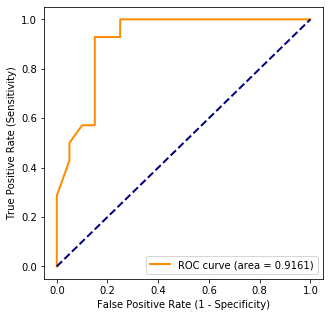

In [11]:
df_twitt=pd.read_excel("twitter.xlsx")

from sklearn.metrics import roc_curve, auc
# compute ROC curve and AUC
fpr, tpr, _ = roc_curve(df_twitt['Actual Class'], df_twitt['Probability of Fake(F) from the Model'],pos_label='F')
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

Most of the time ROC curves are used to show the connection between sensitivity and specificity for every possible cut-off for a test. So here our area is 0.9161, which implies our model is able to classify Fake tweets. Hence from the ROC curve, we can say that our model is more inclined towards a true positive rate.